In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!tar -zxvf /content/drive/My\ Drive/hw7/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [3]:
!unzip /content/drive/My\ Drive/hw7/glove.6B.zip

Archive:  /content/drive/My Drive/hw7/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [4]:
!cp /content/drive/My\ Drive/hw7/positive.txt .
!cp /content/drive/My\ Drive/hw7/negative.txt .

In [5]:
filepath = 'positive.txt'
L_pos = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_pos.append(line.strip())
        line = fp.readline()
        cnt += 1

for word in L_pos:
    print(word)
print(len(L_pos))

a+
abound
abounds
abundance
abundant
accessable
accessible
acclaim
acclaimed
acclamation
accolade
accolades
accommodative
accomodative
accomplish
accomplished
accomplishment
accomplishments
accurate
accurately
achievable
achievement
achievements
achievible
acumen
adaptable
adaptive
adequate
adjustable
admirable
admirably
admiration
admire
admirer
admiring
admiringly
adorable
adore
adored
adorer
adoring
adoringly
adroit
adroitly
adulate
adulation
adulatory
advanced
advantage
advantageous
advantageously
advantages
adventuresome
adventurous
advocate
advocated
advocates
affability
affable
affably
affectation
affection
affectionate
affinity
affirm
affirmation
affirmative
affluence
affluent
afford
affordable
affordably
afordable
agile
agilely
agility
agreeable
agreeableness
agreeably
all-around
alluring
alluringly
altruistic
altruistically
amaze
amazed
amazement
amazes
amazing
amazingly
ambitious
ambitiously
ameliorate
amenable
amenity
amiability
amiabily
amiable
amicability
amicable
amicabl

In [6]:
filepath = 'negative.txt'
L_neg = []
with open(filepath) as fp:
    line = fp.readline()
    cnt = 1
    while line:
        if cnt > 35:
            L_neg.append(line.strip())
        line = fp.readline()
        cnt += 1
for word in L_neg:
    print(word)
print(len(L_neg))

2-faced
2-faces
abnormal
abolish
abominable
abominably
abominate
abomination
abort
aborted
aborts
abrade
abrasive
abrupt
abruptly
abscond
absence
absent-minded
absentee
absurd
absurdity
absurdly
absurdness
abuse
abused
abuses
abusive
abysmal
abysmally
abyss
accidental
accost
accursed
accusation
accusations
accuse
accuses
accusing
accusingly
acerbate
acerbic
acerbically
ache
ached
aches
achey
aching
acrid
acridly
acridness
acrimonious
acrimoniously
acrimony
adamant
adamantly
addict
addicted
addicting
addicts
admonish
admonisher
admonishingly
admonishment
admonition
adulterate
adulterated
adulteration
adulterier
adversarial
adversary
adverse
adversity
afflict
affliction
afflictive
affront
afraid
aggravate
aggravating
aggravation
aggression
aggressive
aggressiveness
aggressor
aggrieve
aggrieved
aggrivation
aghast
agonies
agonize
agonizing
agonizingly
agony
aground
ail
ailing
ailment
aimless
alarm
alarmed
alarming
alarmingly
alienate
alienated
alienation
allegation
allegations
allege
aller

In [7]:
import os

imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [8]:
texts[:2]

["Maddy (Debbie Rochon) is a mentally unstable young woman with a troubled past who gets more than she bargained for when she goes to a pool party with a handsome coworker. When her date and his friends jokingly say they belong to a `Murder Club,' Maddy takes it seriously and moves straight up to `Level 3' by bashing in the brains of a woman in a parking garage (for denting her car!). But is Maddy also the one donning a plastic mask and killing off other members of the group or has someone else lost it?<br /><br />The plot of this film (originally titled MAKE 'EM BLEED) is very poorly conceived, full of holes and spirals completely out of control before a ludicrous, out-of-left-field twist ending. Some of the dialogue is downright laughable. I didn't have a problem with Rochon's performance, but the supporting cast was atrocious. However, I managed to sit through this Full Moon release thoroughly entertained. There's plenty of skin and blood and it's the perfect type of flick to sit ar

In [9]:
labels[:2]

[0, 0]

In [10]:
len(labels)

25000

In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 600  # We will cut reviews after 600 words
training_samples = 20000  # We will be training on 20000 samples
validation_samples = 5000  # We will be validating on 5000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 600)
Shape of label tensor: (25000,)


In [12]:
word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'has': 44,
 'if': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [13]:
data.shape

(25000, 600)

In [14]:
glove_dir = '.'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [15]:
embedding_dim = 300

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [16]:
L_POS = []
for word in L_pos:
    if word in embeddings_index and word in word_index and word_index[word] < max_words:
        L_POS.append(word)
L_NEG = []
for word in L_neg:
    if word in embeddings_index and word in word_index and word_index[word] < max_words:
        L_NEG.append(word)
len(L_POS), len(L_NEG)

(709, 1162)

In [17]:
# fill in your code here
P = []
count = 0
for word in word_index:
    if word in L_POS:
        count += 1
        if count > 100:
            break
        P.append(word)

print(P)

['like', 'good', 'well', 'great', 'best', 'love', 'better', 'work', 'pretty', 'enough', 'right', 'interesting', 'fun', 'worth', 'beautiful', 'excellent', 'nice', 'top', 'classic', 'enjoy', 'recommend', 'wonderful', 'perfect', 'liked', 'entertaining', 'loved', 'fans', 'fine', 'amazing', 'humor', 'lead', 'works', 'enjoyed', 'favorite', 'brilliant', 'decent', 'strong', 'wonder', 'hero', 'hilarious', 'cool', 'happy', 'important', 'talent', 'modern', 'clearly', 'supporting', 'fast', 'romantic', 'enjoyable', 'easy', 'fantastic', 'clear', 'famous', 'realistic', 'leads', 'greatest', 'believable', 'free', 'hot', 'superb', 'memorable', 'beauty', 'perfectly', 'worked', 'incredibly', 'leading', 'powerful', 'masterpiece', 'fairly', 'talented', 'success', 'rich', 'cute', 'sweet', 'incredible', 'pure', 'popular', 'convincing', 'intelligent', 'clever', 'successful', 'positive', 'exciting', 'effective', 'amusing', 'appreciate', 'solid', 'impressive', 'respect', 'super', 'win', 'recommended', 'awesome',

In [18]:
# fill in your code here
N = []
count = 0
for word in word_index:
    if word in L_NEG:
        count += 1
        if count > 100:
            break
        N.append(word)

print(N)

['bad', 'plot', 'funny', 'worst', 'hard', 'poor', 'death', 'dead', 'wrong', 'boring', 'awful', 'stupid', 'terrible', 'lost', 'worse', 'waste', 'problem', 'evil', 'killer', 'dark', 'unfortunately', 'kill', 'horrible', 'slow', 'killed', 'lack', 'murder', 'crap', 'hell', 'annoying', 'sad', 'scary', 'ridiculous', 'strange', 'disappointed', 'cheap', 'silly', 'problems', 'miss', 'falls', 'mystery', 'dull', 'die', 'hate', 'sorry', 'fall', 'weak', 'crime', 'doubt', 'lame', 'poorly', 'zombie', 'difficult', 'killing', 'shame', 'badly', 'weird', 'crazy', 'mess', 'creepy', 'cheesy', 'monster', 'joke', 'break', 'dumb', 'fails', 'twist', 'odd', 'sadly', 'cold', 'missed', 'wasted', 'revenge', 'tension', 'fear', 'bored', 'kills', 'violent', 'trouble', 'died', 'pointless', 'trash', 'bizarre', 'impossible', 'mad', 'prison', 'sick', 'disturbing', 'failed', 'fake', 'fiction', 'pathetic', 'garbage', 'utterly', 'attack', 'loud', 'twists', 'unbelievable', 'complex', 'laughable']


In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [20]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 0.6486 - acc: 0.6694 - val_loss: 0.5304 - val_acc: 0.7456
Epoch 2/10
625/625 [==============================] - 2s 3ms/step - loss: 0.3733 - acc: 0.8366 - val_loss: 0.5209 - val_acc: 0.7510
Epoch 3/10
625/625 [==============================] - 2s 3ms/step - loss: 0.2225 - acc: 0.9127 - val_loss: 0.6042 - val_acc: 0.7678
Epoch 4/10
625/625 [==============================] - 2s 3ms/step - loss: 0.1323 - acc: 0.9495 - val_loss: 0.7298 - val_acc: 0.7612
Epoch 5/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0745 - acc: 0.9704 - val_loss: 0.9134 - val_acc: 0.7532
Epoch 6/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0487 - acc: 0.9804 - val_loss: 1.2931 - val_acc: 0.7348
Epoch 7/10
625/625 [==============================] - 2s 3ms/step - loss: 0.0341 - acc: 0.9866 - val_loss: 1.2846 - val_acc: 0.7516
Epoch 8/10
625/625 [==============================] - 2s 3ms/step - loss: 0.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

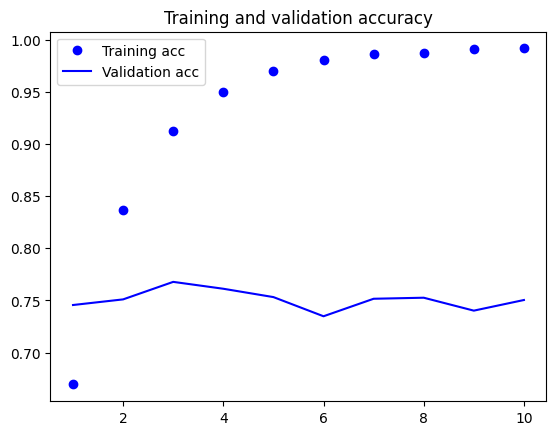

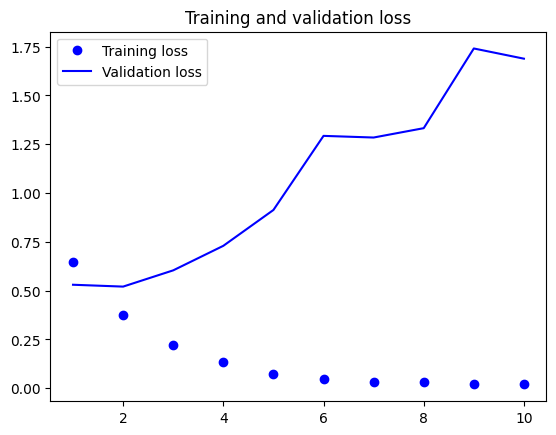

In [22]:
plot_history(history)

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 43s 68ms/step - loss: 0.6411 - acc: 0.6757 - val_loss: 0.4865 - val_acc: 0.7824
Epoch 2/10
625/625 [==============================] - 17s 28ms/step - loss: 0.3618 - acc: 0.8500 - val_loss: 0.4170 - val_acc: 0.8104
Epoch 3/10
625/625 [==============================] - 10s 16ms/step - loss: 0.1629 - acc: 0.9406 - val_loss: 0.5245 - val_acc: 0.8186
Epoch 4/10
625/625 [==============================] - 8s 13ms/step - loss: 0.0585 - acc: 0.9783 - val_loss: 0.6403 - val_acc: 0.8150
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0213 - acc: 0.9922 - val_loss: 0.8567 - val_acc: 0.8088
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.0074 - acc: 0.9962 - val_loss: 1.0045 - val_acc: 0.8180
Epoch 7/10
625/625 [==============================] - 4s 6ms/step - loss: 0.0049 - acc: 0.9968 - val_loss: 1.0051 - val_acc: 0.8196
Epoch 8/10
625/625 [==============================] - 4s 6ms/step - l

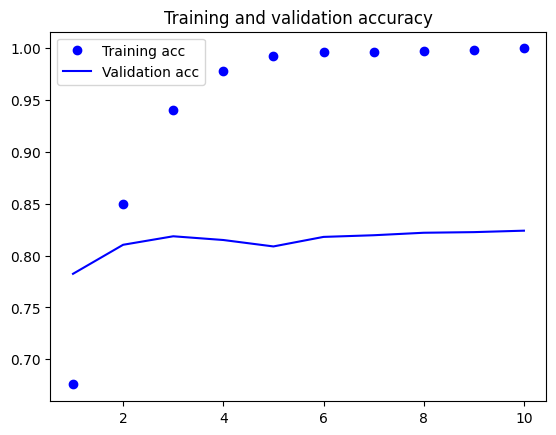

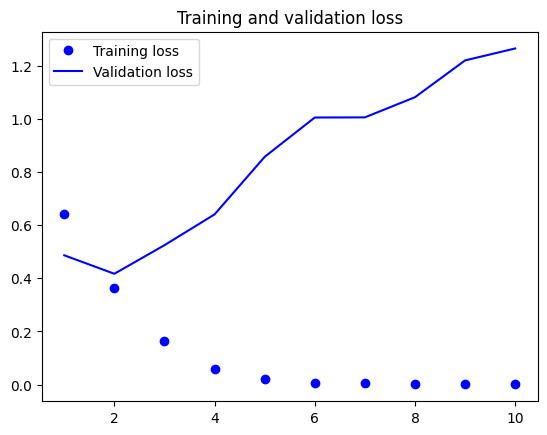

In [24]:
plot_history(history)

In [25]:
embedding_matrix1 = model.layers[0].get_weights()[0]

In [26]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 41s 63ms/step - loss: 0.4777 - acc: 0.7709 - val_loss: 0.4038 - val_acc: 0.8220
Epoch 2/10
625/625 [==============================] - 25s 40ms/step - loss: 0.3116 - acc: 0.8692 - val_loss: 0.3088 - val_acc: 0.8756
Epoch 3/10
625/625 [==============================] - 19s 31ms/step - loss: 0.2342 - acc: 0.9064 - val_loss: 0.2627 - val_acc: 0.8940
Epoch 4/10
625/625 [==============================] - 19s 30ms/step - loss: 0.1860 - acc: 0.9291 - val_loss: 0.2926 - val_acc: 0.8894
Epoch 5/10
625/625 [==============================] - 18s 29ms/step - loss: 0.1455 - acc: 0.9472 - val_loss: 0.2624 - val_acc: 0.9016
Epoch 6/10
625/625 [==============================] - 17s 28ms/step - loss: 0.1101 - acc: 0.9621 - val_loss: 0.2845 - val_acc: 0.8986
Epoch 7/10
625/625 [==============================] - 16s 26ms/step - loss: 0.0793 - acc: 0.9740 - val_loss: 0.3417 - val_acc: 0.8968
Epoch 8/10
625/625 [==============================] - 16s 26ms

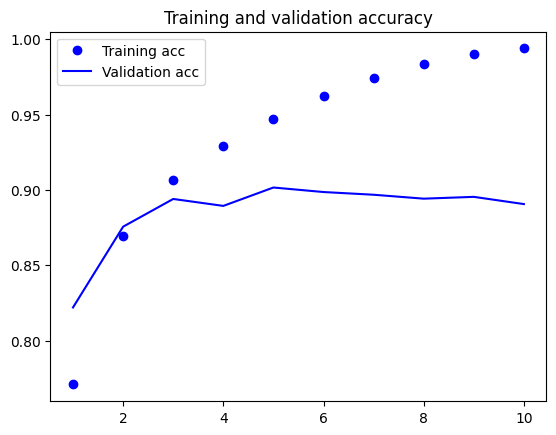

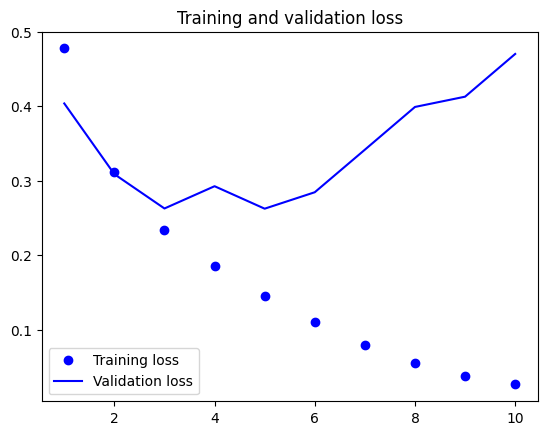

In [27]:
plot_history(history)

In [28]:
embedding_matrix2 = model.layers[0].get_weights()[0]

In [29]:
embedding_matrix2.shape

(10000, 300)

In [30]:
def word_dist(word1, word2, embedding_matrix):
    # fill in your code here
    v1 = embedding_matrix[word_index[word1]]
    v2 = embedding_matrix[word_index[word2]]
    dist = np.linalg.norm(v1 - v2)
    return dist

def dist_glove(word1, word2):
    return word_dist(word1, word2, embedding_matrix)

def dist_dense(word1, word2):
    return word_dist(word1, word2, embedding_matrix1)

def dist_LSTM(word1, word2):
    return word_dist(word1, word2, embedding_matrix2)

In [31]:
print(dist_glove('better', 'worse') < dist_glove('worst', 'worse'))
print(dist_dense('better', 'worse') < dist_dense('worst', 'worse'))
print(dist_LSTM('better', 'worse') < dist_LSTM('worst', 'worse'))

True
True
True


In [32]:
print(dist_glove('good', 'bad') < dist_glove('poor', 'bad'))
print(dist_dense('good', 'bad') < dist_dense('poor', 'bad'))
print(dist_LSTM('good', 'bad') < dist_LSTM('poor', 'bad'))

True
False
True


In [33]:
print(dist_glove('bad', 'good') < dist_glove('great', 'good'))
print(dist_dense('bad', 'good') < dist_dense('great', 'good'))
print(dist_LSTM('bad', 'good') < dist_LSTM('great', 'good'))

True
False
False


In [34]:
print(dist_glove('clever', 'clumsy') < dist_glove('clever', 'ingenious'))
print(dist_dense('clever', 'clumsy') < dist_dense('clever', 'ingenious'))
print(dist_LSTM('clever', 'clumsy') < dist_LSTM('clever', 'ingenious'))

False
False
False


In [42]:
def NN_general(word, embedding_matrix):
    # fill in your code here
    if word in embeddings_index and word_index[word] < max_words and word in word_index:
      mindist, nearest = np.inf, ''

      for wrd in (L_neg + L_pos):
          if wrd in embeddings_index and wrd in word_index and wrd != word and word_index[wrd] < max_words:
              dist = word_dist(word, wrd, embedding_matrix)

              if mindist > dist:
                  mindist = dist
                  nearest = wrd

    return nearest

def NN_LSTM(word):
    return NN_general(word, embedding_matrix2)

def NN_dense(word):
    return NN_general(word, embedding_matrix1)

def NN_glove(word):
    return NN_general(word, embedding_matrix)

In [43]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_glove(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_LSTM(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: accurately precisely correctly
:::: admirer admiration avid
:::: afford unfortunately lose
:::: aspirations regard interests
:::: beautifully nicely wonderfully
:::: charisma charm lacks
:::: clearly concerned clear
:::: comfort fortunately ironically
:::: fabulous terrific marvelous
:::: fans delighted delight
:::: finest best foremost
:::: fortune ironically luck
:::: indulgent pretentious overbearing
:::: inspiring captivating inspire
:::: intimate uncomfortable fascinating
:::: likable endearing believable
:::: modern notably well
:::: modest impressive respectable
:::: originality clarity brilliance
:::: peace progress conflict
:::: popular notably well
:::: powerful strong influential
:::: precious valuable priceless
:::: pretty fairly incredibly
:::: realistic straightforward unrealistic
:::: refreshing wonderfully delightful
:::: sublime breathtaking delightful
:::: tolerable laughable absurdity
:::: versatile talented amazingly
:::: wealthy prominent rich
:::: absurdity i

In [44]:
count = 0
for word in L_POS + L_NEG:
    if NN_dense(word) != NN_glove(word) and NN_LSTM(word) == NN_glove(word):
        print('::::', word, NN_dense(word), NN_glove(word))
        count += 1
print(count, 'changes', 'out of', len(L_POS) + len(L_NEG))

:::: advanced sophisticated well
:::: awesome incredible amazing
:::: cure fortunately unfortunately
:::: decency morality fairness
:::: decent respectable good
:::: excellently admirably superbly
:::: fantastic incredible amazing
:::: fantastically amazingly wonderfully
:::: free available well
:::: genuine doubt authentic
:::: glamorous sexy stylish
:::: good well better
:::: greatest foremost great
:::: hardy fortunately ironically
:::: interests regard concerned
:::: like likes well
:::: love passion loves
:::: master well masters
:::: masterful mesmerizing superb
:::: meaningful significant useful
:::: nifty clever delightful
:::: pride ironically shame
:::: promptly effectively unfortunately
:::: trusted ironically regard
:::: upbeat optimistic downbeat
:::: accidental fatal mistaken
:::: assassin killer murderer
:::: bad worse unfortunately
:::: barbarian savage ironically
:::: blind deaf unfortunately
:::: bore ironically unfortunately
:::: breakdown failure unfortunately
:::: 

In [45]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) != NN_dense(word) and NN_dense(word) != NN_glove(word) and NN_LSTM(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: luck unfortunately good fortunately
:::: passion love obsession enthusiasm
:::: poignant haunting hilarious ironic
:::: sensitive concerned important regard
:::: burden unfortunately inevitably immense
:::: exaggeration laughable ludicrous absurdity
:::: maniacal moronic amusingly idiotic
:::: mess messy unfortunately awful
:::: shake unfortunately wonder eager
:::: unable impossible unwilling failed
10


In [46]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) != NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abundance unfortunately spite spite
:::: enjoys enjoyed enjoying enjoying
:::: enough well sufficient sufficient
:::: entertaining amusing enjoyable enjoyable
:::: excellent good superb superb
:::: fascinating interesting intriguing intriguing
:::: fond loving ironically ironically
:::: fun entertaining enjoyable enjoyable
:::: golden best glory glory
:::: great good well well
:::: hug loving smiles smiles
:::: loving love loved loved
:::: nice wonderful lovely lovely
:::: notably well ironically ironically
:::: patience courage wisdom wisdom
:::: patient unfortunately sick sick
:::: profoundly terribly disturbed disturbed
:::: pure unfortunately ideal ideal
:::: readily unfortunately ironically ironically
:::: restored ruined ironically ironically
:::: reward promised promise promise
:::: right well good good
:::: sensational bizarre shocking shocking
:::: suffice ironically pretend pretend
:::: superb excellent brilliant brilliant
:::: survival unfortunately ironically ironicall

In [47]:
count = 0
for word in L_POS + L_NEG:
    if NN_LSTM(word) == NN_dense(word) and NN_dense(word) == NN_glove(word):
        print('::::', word, NN_glove(word), NN_dense(word), NN_LSTM(word))
        count += 1
print(count)

:::: abound ironically ironically ironically
:::: accessible available available available
:::: acclaim praise praise praise
:::: acclaimed renowned renowned renowned
:::: accomplish accomplished accomplished accomplished
:::: accomplished accomplish accomplish accomplish
:::: accomplishment achievement achievement achievement
:::: accurate precise precise precise
:::: achievement accomplishment accomplishment accomplishment
:::: achievements achievement achievement achievement
:::: adequate sufficient sufficient sufficient
:::: admirable commendable commendable commendable
:::: admirably excellently excellently excellently
:::: admiration affection affection affection
:::: admire appreciate appreciate appreciate
:::: adorable cute cute cute
:::: adore despise despise despise
:::: advantage gain gain gain
:::: adventurous inventive inventive inventive
:::: affection admiration admiration admiration
:::: amazed thrilled thrilled thrilled
:::: amazing incredible incredible incredible
:::

In [48]:
emb_glove = []
emb_dense = []
emb_LSTM = []
for word in L_POS + L_NEG:
    emb = embedding_matrix[word_index[word]]
    emb_glove.append(emb)
    emb = embedding_matrix1[word_index[word]]
    emb_dense.append(emb)
    emb = embedding_matrix2[word_index[word]]
    emb_LSTM.append(emb)

In [49]:
emb_glove = np.array(emb_glove)
emb_dense = np.array(emb_dense)
emb_LSTM = np.array(emb_LSTM)

In [50]:
emb_glove.shape, emb_dense.shape, emb_LSTM.shape

((1871, 300), (1871, 300), (1871, 300))

In [51]:
import numpy as np
from sklearn.manifold import TSNE
X_LSTM = TSNE(n_components=2).fit_transform(emb_LSTM)

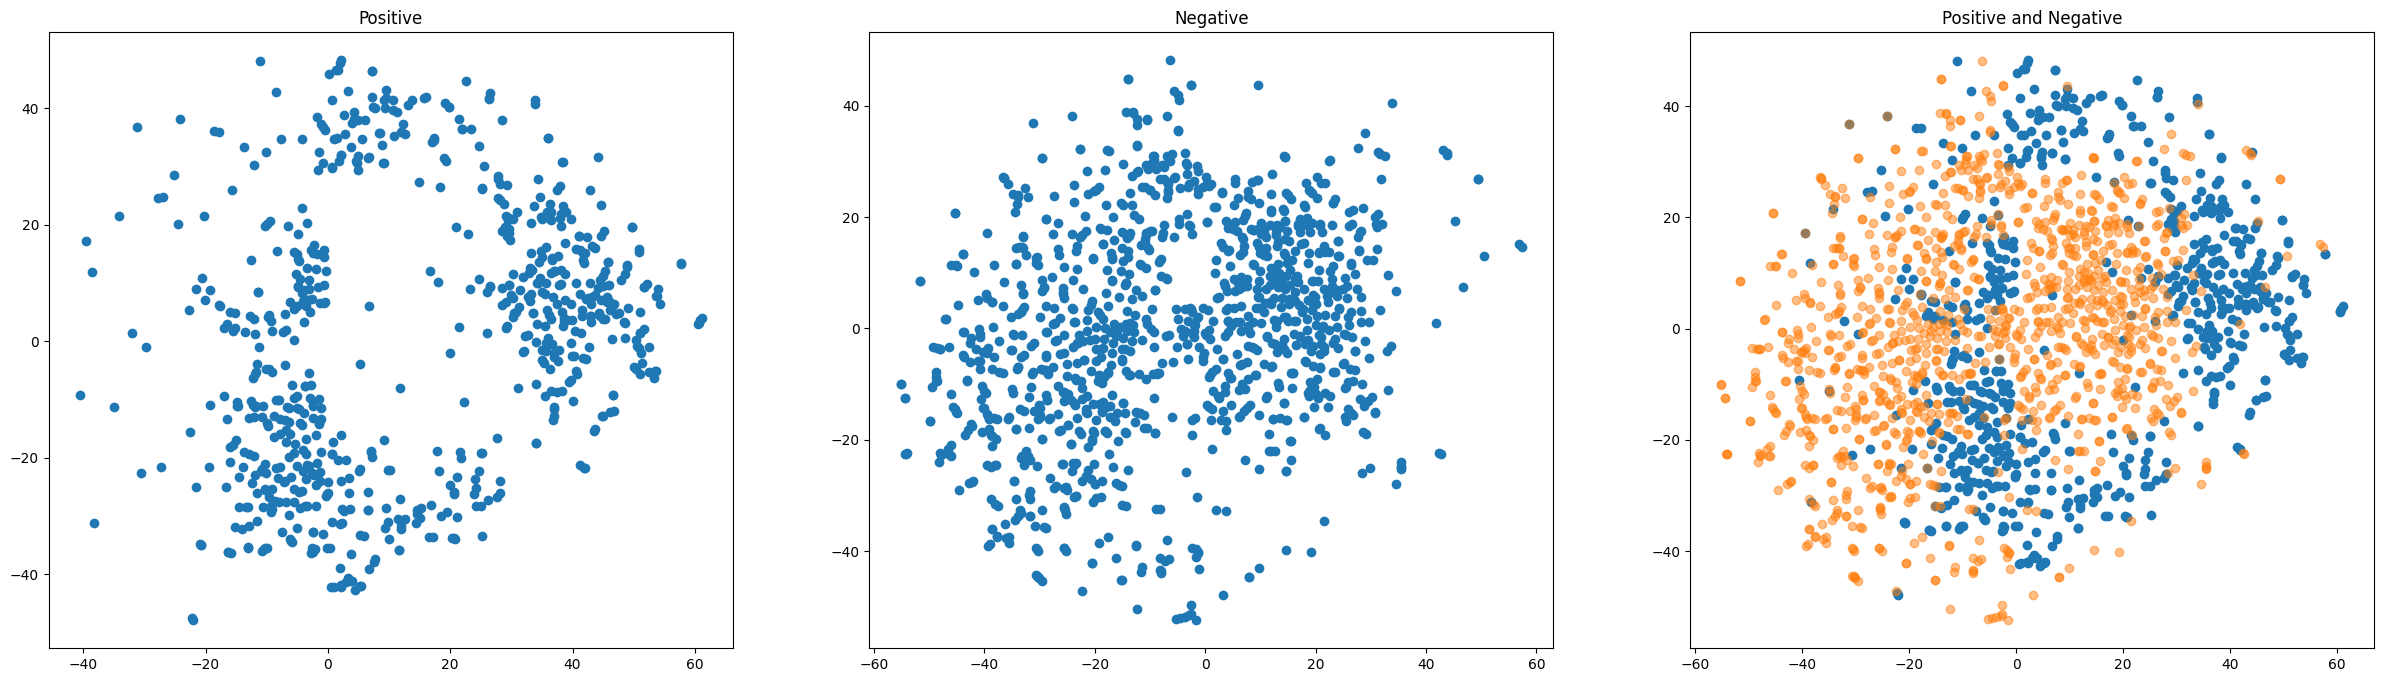

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_LSTM[:len(L_POS),0], X_LSTM[:len(L_POS),1])
plt.scatter(X_LSTM[len(L_POS):,0], X_LSTM[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [53]:
import numpy as np
from sklearn.manifold import TSNE
X_dense = TSNE(n_components=2).fit_transform(emb_dense)

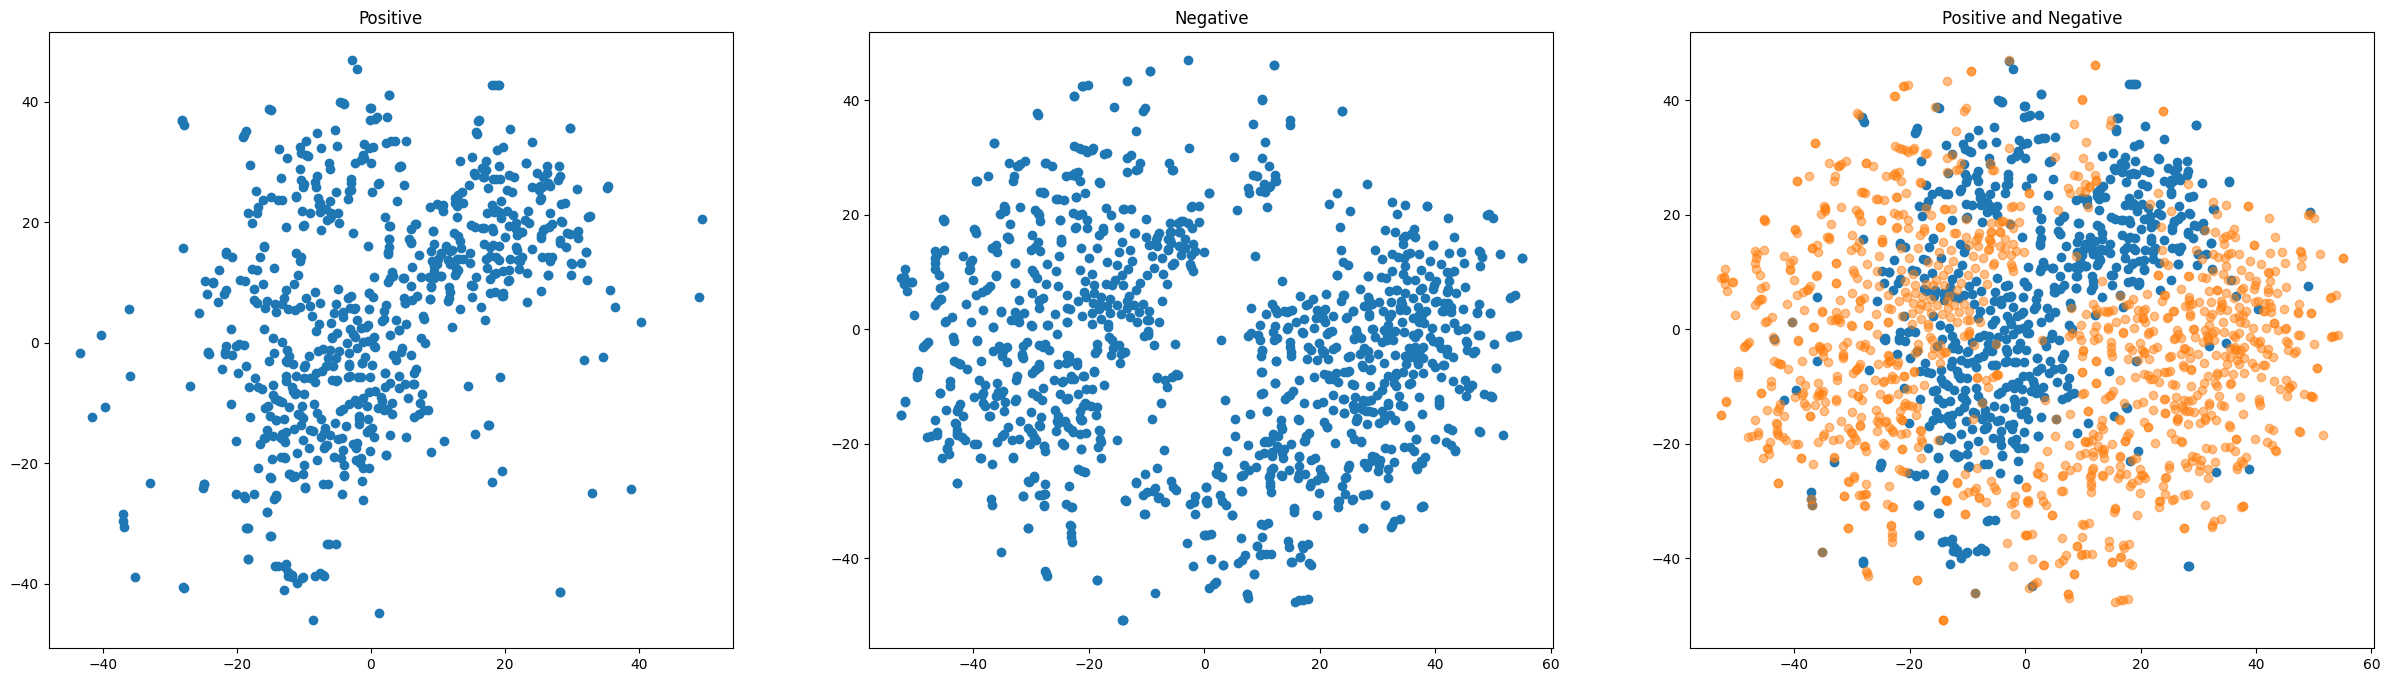

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_dense[:len(L_POS),0], X_dense[:len(L_POS),1])
plt.scatter(X_dense[len(L_POS):,0], X_dense[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [55]:
import numpy as np
from sklearn.manifold import TSNE
X_glove = TSNE(n_components=2).fit_transform(emb_glove)

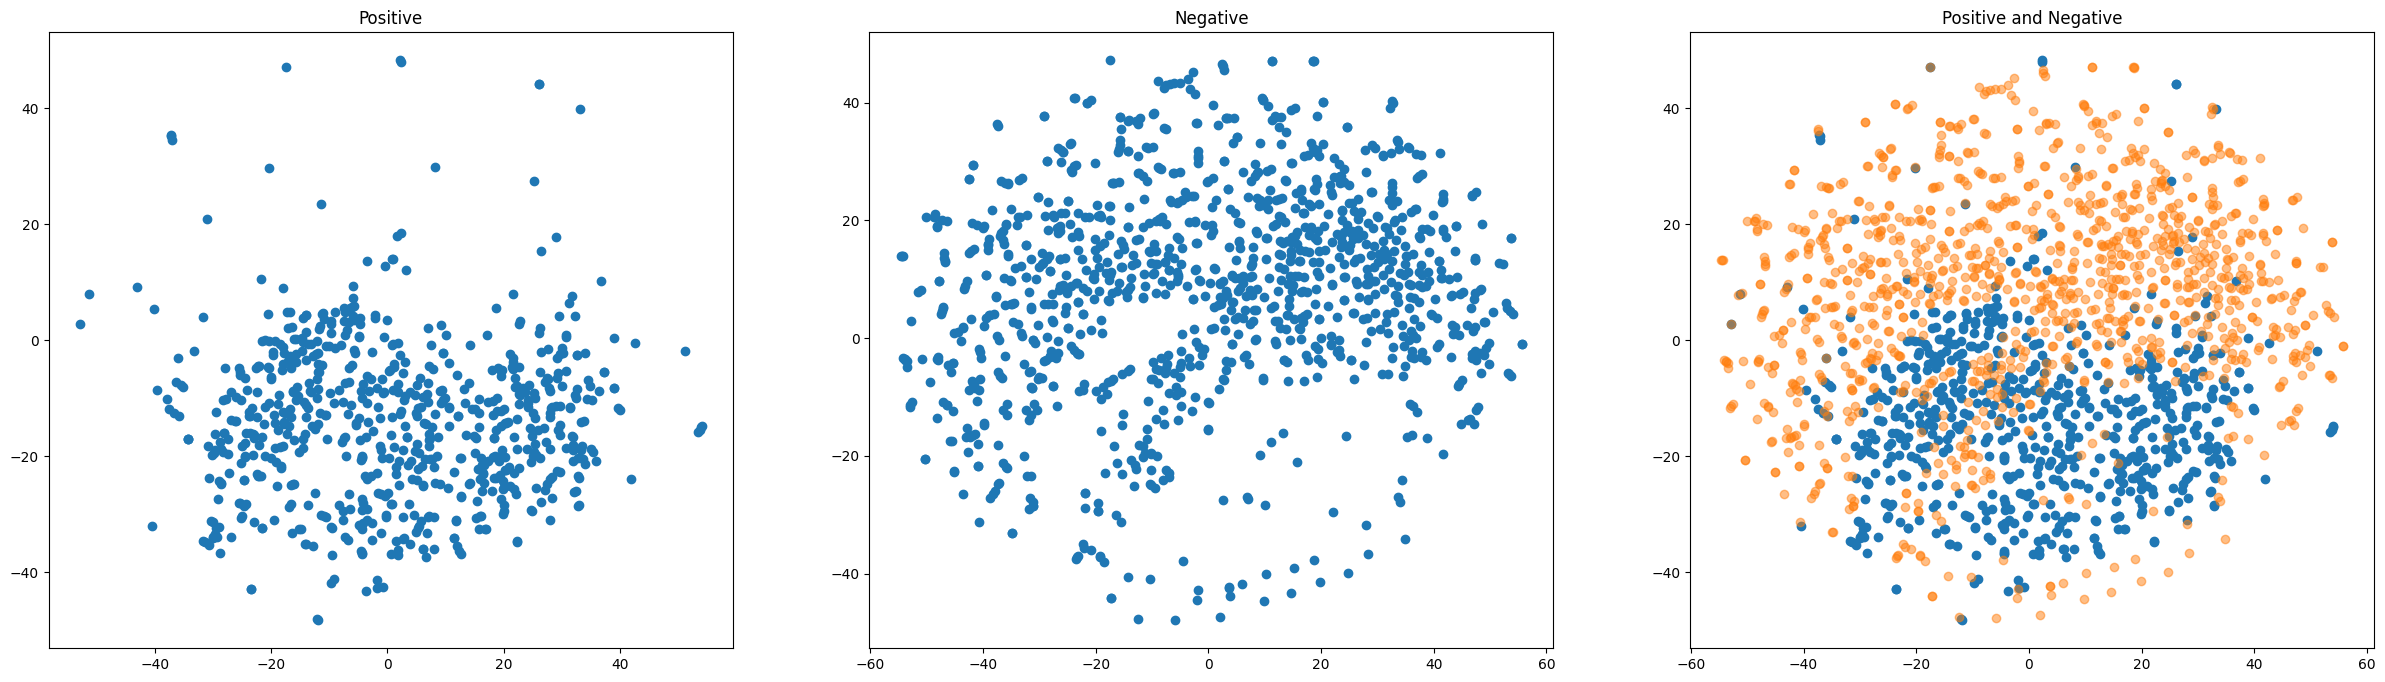

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.subplot(131)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.title("Positive")
plt.subplot(132)
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1])
plt.title("Negative")
plt.subplot(133)
plt.scatter(X_glove[:len(L_POS),0], X_glove[:len(L_POS),1])
plt.scatter(X_glove[len(L_POS):,0], X_glove[len(L_POS):,1], alpha=0.5)
plt.title("Positive and Negative")
plt.show()

In [65]:
def class_dist(L_POS, L_NEG, embedding_matrix):
    # fill in your code here
    # We first calcuate the average distance between a word in L_POS and a word in L_NEG. We call this d12
    # We then calcuate the average distance between two words in L_POS + L_NEG. We call this d
    # We return d12/d as the result
    avg1 = []
    avg2 = []
    L_TOT = L_POS + L_NEG

    for word1 in L_POS:
      for word2 in L_NEG:
        if word1 in word_index and word1 in embeddings_index and word_index[word1] < max_words and word2 in word_index and word2 in embeddings_index and word_index[word2] < max_words:
          distance = word_dist(word1, word2, embedding_matrix)
          avg1.append(distance)

    for word1 in L_TOT:
      for word2 in L_TOT:
        if word1 in word_index and word1 in embeddings_index and word_index[word1] < max_words and word2 in word_index and word2 in embeddings_index and word_index[word2] < max_words:
          distance2 = word_dist(word1, word2, embedding_matrix)
          avg2.append(distance2)

    d12 = sum(avg1)/len(avg1)
    d = sum(avg2)/len(avg2)

    return d12/d

def class_dist_glove():
    return class_dist(L_POS, L_NEG, embedding_matrix)

def class_dist_dense():
    return class_dist(L_POS, L_NEG, embedding_matrix1)

def class_dist_LSTM():
    return class_dist(L_POS, L_NEG, embedding_matrix2)

d_glove = class_dist_glove()
d_dense = class_dist_dense()
d_LSTM = class_dist_LSTM()

In [66]:
print(d_glove, d_dense, d_LSTM)
print("Relative improvments:")
print("Dense:", (d_dense-d_glove)/d_glove*100)
print("LSTM:", (d_LSTM-d_glove)/d_glove*100)

1.00983341322156 1.0109482643938013 1.0101548853282023
Relative improvments:
Dense: 0.11039951319144878
LSTM: 0.031834172095443244


In [67]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].set_weights([embedding_matrix1])
model.layers[0].trainable = False
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Epoch 1/10
625/625 [==============================] - 16s 24ms/step - loss: 0.4330 - acc: 0.8067 - val_loss: 0.3612 - val_acc: 0.8544
Epoch 2/10
625/625 [==============================] - 15s 23ms/step - loss: 0.3283 - acc: 0.8656 - val_loss: 0.3189 - val_acc: 0.8764
Epoch 3/10
625/625 [==============================] - 14s 23ms/step - loss: 0.2810 - acc: 0.8856 - val_loss: 0.3066 - val_acc: 0.8764
Epoch 4/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2571 - acc: 0.8978 - val_loss: 0.2907 - val_acc: 0.8826
Epoch 5/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2387 - acc: 0.9031 - val_loss: 0.2898 - val_acc: 0.8892
Epoch 6/10
625/625 [==============================] - 15s 23ms/step - loss: 0.2238 - acc: 0.9085 - val_loss: 0.2912 - val_acc: 0.8924
Epoch 7/10
625/625 [==============================] - 15s 24ms/step - loss: 0.2066 - acc: 0.9196 - val_loss: 0.2660 - val_acc: 0.8960
Epoch 8/10
625/625 [==============================] - 15s 23ms

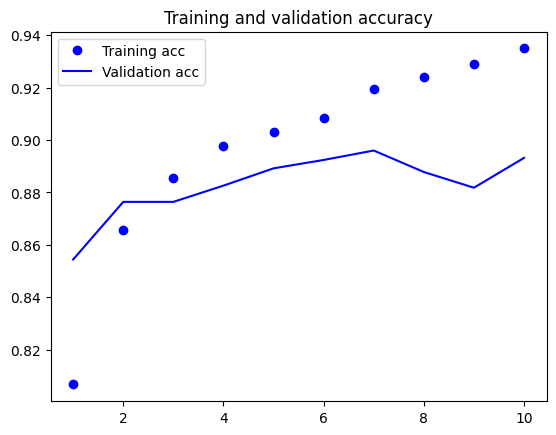

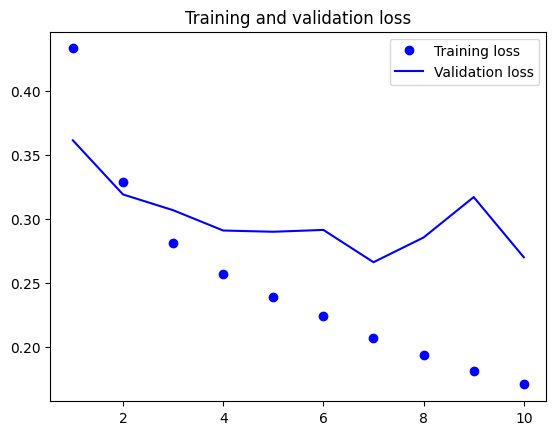

In [68]:
plot_history(history)

In [69]:
from keras import backend as K

K.clear_session()

In [70]:
import keras
from keras import layers
from keras import models

input_shape = (maxlen, )

left_inputs = layers.Input(shape=input_shape)

x = Embedding(max_words, embedding_dim, weights=[embedding_matrix1], trainable=False, input_length=maxlen)(left_inputs)

x = layers.Bidirectional(layers.LSTM(128, return_sequences = True))(x)

x = layers.Conv1D(64, 7, activation='relu')(x)

x = layers.GlobalMaxPool1D()(x)

right_inputs = layers.Input(shape=input_shape)

y = layers.Embedding(max_words, embedding_dim, weights=[embedding_matrix1], trainable=False, input_length=maxlen)(right_inputs)

y = layers.Bidirectional(LSTM(128, return_sequences = True))(y)

y = layers.Conv1D(64, 7, activation='relu')(y)

y = layers.GlobalMaxPool1D()(y)

x = layers.concatenate([x, y])
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation='sigmoid')(x)
model = models.Model([left_inputs, right_inputs], outputs=outputs)


In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [72]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D.h5', monitor='val_loss', save_best_only=True,)]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 57s 82ms/step - loss: 0.3182 - acc: 0.8662 - val_loss: 0.2673 - val_acc: 0.8886
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


625/625 [==============================] - 50s 80ms/step - loss: 0.2408 - acc: 0.9035 - val_loss: 0.2510 - val_acc: 0.8984
Epoch 3/200
625/625 [==============================] - 50s 80ms/step - loss: 0.1998 - acc: 0.9211 - val_loss: 0.2365 - val_acc: 0.9052
Epoch 4/200
625/625 [==============================] - 49s 78ms/step - loss: 0.1554 - acc: 0.9414 - val_loss: 0.2545 - val_acc: 0.9052
Epoch 5/200
625/625 [==============================] - 50s 79ms/step - loss: 0.1124 - acc: 0.9592 - val_loss: 0.3474 - val_acc: 0.8838
Epoch 6/200
625/625 [==============================] - 50s 79ms/step - loss: 0.0684 - acc: 0.9761 - val_loss: 0.3511 - val_acc: 0.8856
Epoch 7/200
625/625 [==============================] - 50s 80ms/step - loss: 0.0448 - acc: 0.9837 - val_loss: 0.3877 - val_acc: 0.8966
Epoch 8/200
625/625 [==============================] - 49s 79ms/step - loss: 0.0281 - acc: 0.9902 - val_loss: 0.4331 - val_acc: 0.8982


In [73]:
print(model.layers[3].name)

embedding_1


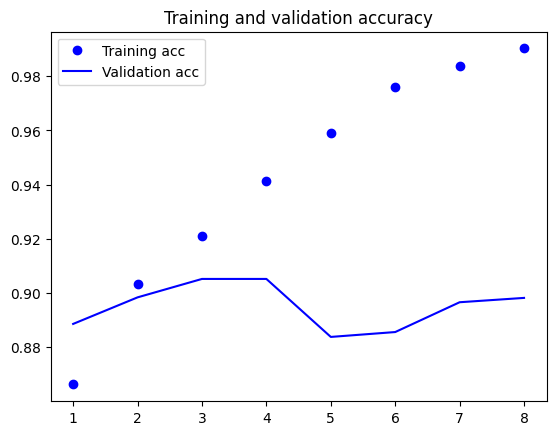

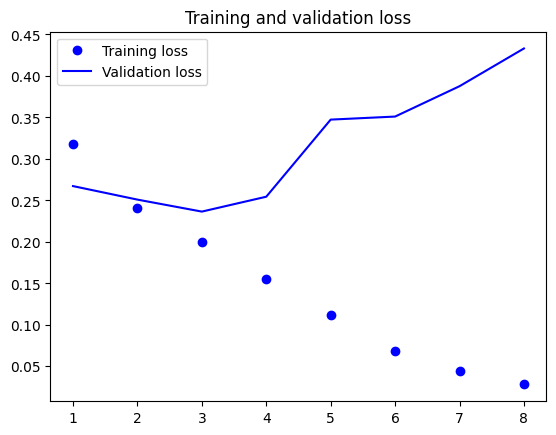

In [74]:
plot_history(history)

In [75]:
model = keras.models.load_model('LSTM_Conv1D.h5')
for i in range(len(model.layers)):
    model.layers[i].trainable = False

model.layers[2].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [76]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain.h5', monitor='val_loss', save_best_only=True,)]


history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 104s 160ms/step - loss: 0.1339 - acc: 0.9506 - val_loss: 0.2237 - val_acc: 0.9118
Epoch 2/200
625/625 [==============================] - 60s 95ms/step - loss: 0.0849 - acc: 0.9755 - val_loss: 0.2310 - val_acc: 0.9120
Epoch 3/200
625/625 [==============================] - 49s 78ms/step - loss: 0.0563 - acc: 0.9877 - val_loss: 0.2398 - val_acc: 0.9084
Epoch 4/200
625/625 [==============================] - 46s 74ms/step - loss: 0.0386 - acc: 0.9933 - val_loss: 0.2527 - val_acc: 0.9058
Epoch 5/200
625/625 [==============================] - 42s 67ms/step - loss: 0.0267 - acc: 0.9965 - val_loss: 0.2586 - val_acc: 0.9082
Epoch 6/200
625/625 [==============================] - 40s 65ms/step - loss: 0.0181 - acc: 0.9984 - val_loss: 0.2742 - val_acc: 0.9040


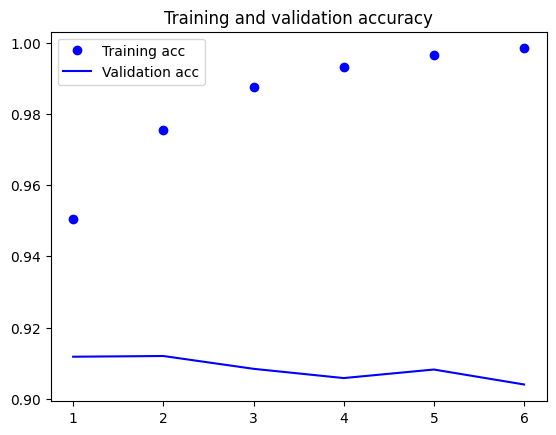

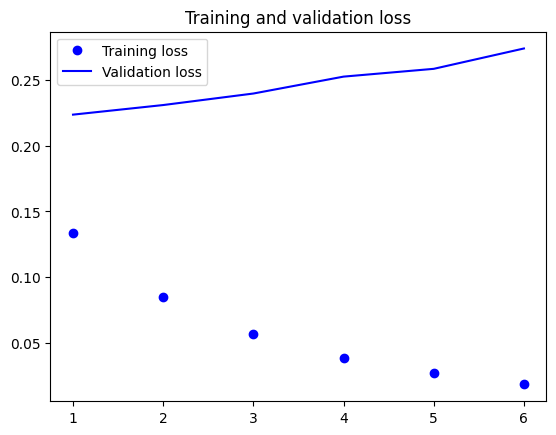

In [77]:
plot_history(history)

In [78]:
model = keras.models.load_model('LSTM_Conv1D_retrain.h5')
for i in range(len(model.layers)):
    model.layers[i].trainable = False

model.layers[3].trainable = True

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 600)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 600, 300)             3000000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 600, 300)             3000000   ['input_2[0][0]']             
                                                                                              

In [79]:
# This is an important technique one needs to learn
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,),
    keras.callbacks.ModelCheckpoint(filepath='LSTM_Conv1D_retrain_1.h5', monitor='val_loss', save_best_only=True,)]


history = model.fit([x_train, x_train], y_train, shuffle=True,
                    epochs=200,
                    batch_size=32,
                    callbacks=callbacks_list,
                    validation_data=([x_val, x_val], y_val))

Epoch 1/200
625/625 [==============================] - 81s 123ms/step - loss: 0.0820 - acc: 0.9779 - val_loss: 0.2246 - val_acc: 0.9122
Epoch 2/200
625/625 [==============================] - 53s 85ms/step - loss: 0.0637 - acc: 0.9849 - val_loss: 0.2307 - val_acc: 0.9128
Epoch 3/200
625/625 [==============================] - 45s 73ms/step - loss: 0.0492 - acc: 0.9901 - val_loss: 0.2295 - val_acc: 0.9138
Epoch 4/200
625/625 [==============================] - 42s 68ms/step - loss: 0.0376 - acc: 0.9937 - val_loss: 0.2366 - val_acc: 0.9130
Epoch 5/200
625/625 [==============================] - 41s 66ms/step - loss: 0.0288 - acc: 0.9961 - val_loss: 0.2455 - val_acc: 0.9120
Epoch 6/200
625/625 [==============================] - 40s 64ms/step - loss: 0.0223 - acc: 0.9975 - val_loss: 0.2481 - val_acc: 0.9112


In [80]:
model = keras.models.load_model('LSTM_Conv1D_retrain_1.h5')

In [81]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [82]:
model.evaluate([x_test, x_test], y_test)

782/782 [==============================] - 25s 30ms/step - loss: 0.2254 - acc: 0.9100


[0.2254231572151184, 0.9099599719047546]